In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])

In [13]:
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [14]:
df.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [15]:
df = (df- df.mean())/df.std() #feature scaling
df.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [16]:
def GradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X*theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - ((alpha/ len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost
    

In [17]:
def computeCost(X, y, theta):
    inner = np.power(((X*theta.T) - y), 2)
    return np.sum(inner)/(2*len(X))

In [18]:
df.insert(0, 'Ones', 1)
# set X (training data) and y (target variable)
cols = df.shape[1]  
X = df.iloc[:,0:cols-1]  
y = df.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X = np.matrix(X.values)  
y = np.matrix(y.values)  
theta = np.matrix(np.array([0,0,0]))  
alpha = 0.01
iters = 1000

In [19]:
g, cost = GradientDescent(X, y, theta, alpha, iters)
g

matrix([[-1.04077503e-16,  8.78503652e-01, -4.69166570e-02]])

In [20]:
computeCost(X, y, theta)

0.48936170212765967

Text(0.5,1,'Error vs. Training Epoch')

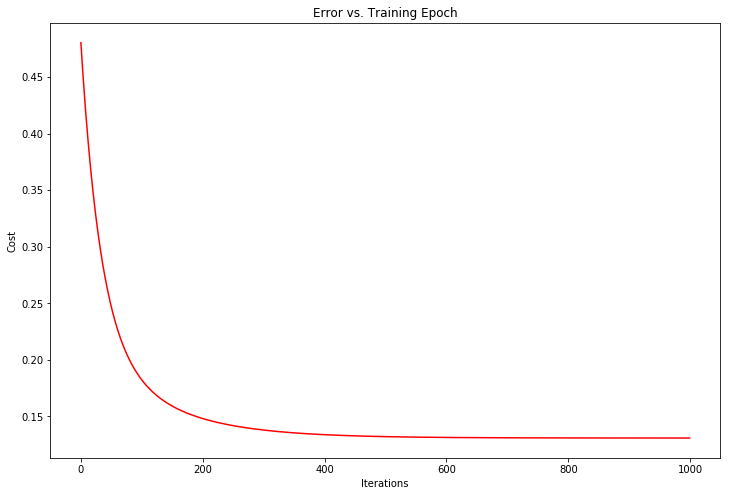

In [21]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  